<a href="https://colab.research.google.com/github/amirabehery/AMIT/blob/main/sonar_dataset_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Computer_Vision/NN/sonar_dataset.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.iloc[:, -1].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
df.iloc[:, -1] = df.iloc[:, -1].map({'M':1,'R':0})

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((166, 60), (42, 60), (166,), (42,))

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(60,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
17/17 [==============================] - 2s 19ms/step - loss: 0.7247 - accuracy: 0.4699 - val_loss: 0.7177 - val_accuracy: 0.4762
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5602 - val_loss: 0.6857 - val_accuracy: 0.5714
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 0.6799 - accuracy: 0.5542 - val_loss: 0.6724 - val_accuracy: 0.5476
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6676 - accuracy: 0.5964 - val_loss: 0.6711 - val_accuracy: 0.5952
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.6506 - val_loss: 0.6630 - val_accuracy: 0.5714
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6486 - accuracy: 0.6506 - val_loss: 0.6460 - val_accuracy: 0.6190
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.6988 - val_loss: 0.6458 - val_accuracy: 0.5952
Epoch 8/50
17/17 [=

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.7619
Accuracy: 76.19


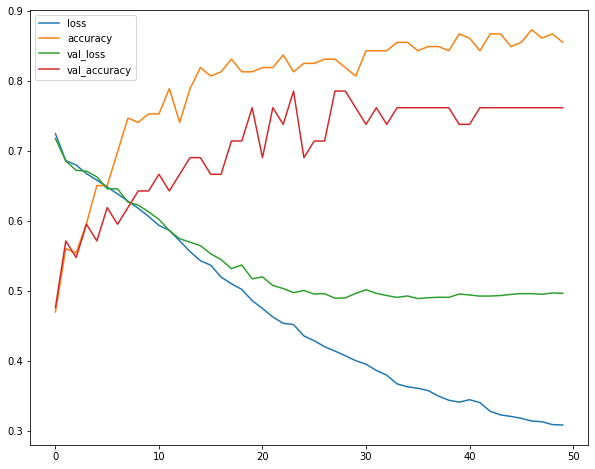

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.show()

In [ ]:
model1 = Sequential()
model1.add(Dense(15, input_shape=(60,), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(10, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=50, batch_size=12, validation_data=(x_test, y_test))

Epoch 1/50
14/14 [==============================] - 2s 24ms/step - loss: 0.8008 - accuracy: 0.4940 - val_loss: 0.6859 - val_accuracy: 0.6429
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 0.5990 - accuracy: 0.6807 - val_loss: 0.6781 - val_accuracy: 0.6190
Epoch 3/50
14/14 [==============================] - 0s 7ms/step - loss: 0.5306 - accuracy: 0.7410 - val_loss: 0.6729 - val_accuracy: 0.6190
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.5114 - accuracy: 0.7590 - val_loss: 0.6669 - val_accuracy: 0.6190
Epoch 5/50
14/14 [==============================] - 0s 8ms/step - loss: 0.4980 - accuracy: 0.8012 - val_loss: 0.6624 - val_accuracy: 0.6190
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.4772 - accuracy: 0.7831 - val_loss: 0.6575 - val_accuracy: 0.6190
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.4345 - accuracy: 0.8133 - val_loss: 0.6486 - val_accuracy: 0.6190
Epoch 8/50
14/14 [=

In [ ]:
_, accuracy = model1.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.4840 - accuracy: 0.7857
Accuracy: 78.57


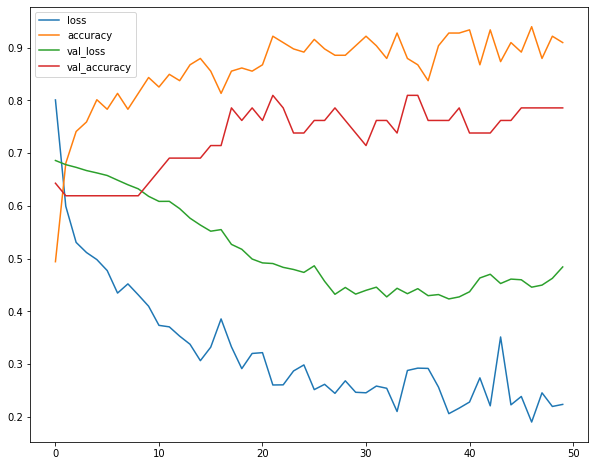

In [ ]:
pd.DataFrame(history1.history).plot(figsize=(10,8))
plt.show()